Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input_x (InputLayer)    [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 4)            12          encoder_input_x[0][0]            
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 4)            20          dense_12[0][0]                   
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 3)            15          dense_13[0][0]                   
____________________________________________________________________________________________

Model: "vae"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input_x (InputLayer)    [(None, 2)]          0                                            
__________________________________________________________________________________________________
encoder_input_y (InputLayer)    [(None, 3)]          0                                            
__________________________________________________________________________________________________
encoder (Model)                 multiple             84          encoder_input_x[0][0]            
                                                                 encoder_input_y[0][0]            
__________________________________________________________________________________________________
decoder (Model)                 [(None, 2), (None, 3 75          encoder[1][0]                  

100000/100000 [==============================] - 1s 10us/sample - loss: 2.5896 - val_loss: 2.1813
Epoch 2/100
100000/100000 [==============================] - 0s 2us/sample - loss: 1.8884 - val_loss: 1.7216
Epoch 3/100
100000/100000 [==============================] - 0s 2us/sample - loss: 1.6476 - val_loss: 1.6261
Epoch 4/100
100000/100000 [==============================] - 0s 2us/sample - loss: 1.6196 - val_loss: 1.6211
Epoch 5/100
100000/100000 [==============================] - 0s 2us/sample - loss: 1.6158 - val_loss: 1.6173
Epoch 6/100
100000/100000 [==============================] - 0s 2us/sample - loss: 1.6103 - val_loss: 1.6080
Epoch 7/100
100000/100000 [==============================] - 0s 2us/sample - loss: 1.5789 - val_loss: 1.5147
Epoch 8/100
100000/100000 [==============================] - 0s 2us/sample - loss: 1.3266 - val_loss: 1.1222
Epoch 9/100
100000/100000 [==============================] - 0s 2us/sample - loss: 1.0075 - val_loss: 0.9392
Epoch 10/100
100000/100000 [==

100000/100000 [==============================] - 0s 2us/sample - loss: 0.3149 - val_loss: 0.3105
Epoch 76/100
100000/100000 [==============================] - 0s 2us/sample - loss: 0.3222 - val_loss: 0.3099
Epoch 77/100
100000/100000 [==============================] - 0s 2us/sample - loss: 0.3230 - val_loss: 0.3055
Epoch 78/100
100000/100000 [==============================] - 0s 2us/sample - loss: 0.3205 - val_loss: 0.3061
Epoch 79/100
100000/100000 [==============================] - 0s 2us/sample - loss: 0.3123 - val_loss: 0.3170
Epoch 80/100
100000/100000 [==============================] - 0s 2us/sample - loss: 0.3113 - val_loss: 0.3212
Epoch 81/100
100000/100000 [==============================] - 0s 2us/sample - loss: 0.3124 - val_loss: 0.3045
Epoch 82/100
100000/100000 [==============================] - 0s 3us/sample - loss: 0.3178 - val_loss: 0.3040
Epoch 83/100
100000/100000 [==============================] - 0s 2us/sample - loss: 0.3227 - val_loss: 0.3050
Epoch 84/100
100000/100

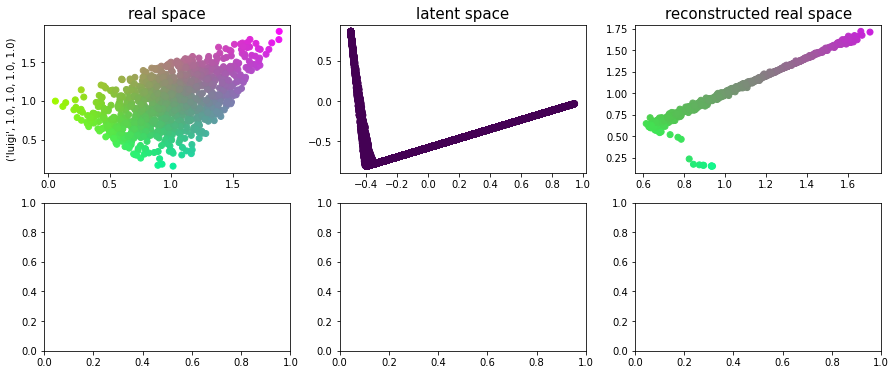

In [2]:
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
import pickle
import warnings
import results_daa
warnings.filterwarnings('ignore') # suppresses warnings that arise because original code uses ...
# ... deprecated tf version after first execution of cell 
res_filename = 'newres'
datadict= results_daa.create_data()
results_daa.collect_results(data = datadict,
                    into = res_filename, 
                    version = 'luigi', 
                    at_loss_factor=1.0, 
                    target_loss_factor=1.0,
                    recon_loss_factor=1.0,
                    kl_loss_factor=1.0)
results_daa.plot_results(res_filename)